1. Importar as bibliotecas "Pandas" e "Numpy" (Usaremos as abreviações pd e np, respectivamente, para faciliar a notação.
Importe também a biblioteca Math.

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

2. Defina a variável "arquivo" pelo nome do arquivo da planilha.
Defina também a variável "coluna". Essa variável definirá qual a variável será considerada para a construção da tabela.

In [ ]:
arquivo = 'energia sustentável 1.xlsx'
coluna = 'Eletricidade a partir de combustíveis fósseis (TWh)'

3. Leia a planilha no Phyton (para isso use o comando pd.read_excel(...) ). Dê um nome (nesse caso chamaremos de "df").

In [ ]:
df=pd.read_excel(arquivo)

4. Vamos encontrar a amplitude total dos dados.

In [ ]:
at = df[coluna].max() - df[coluna].min()

4. Vamos decidir quantas classes terá a tabela.

Podemos utilizar k como sendo a raiz quadrada do total de registros/amostras, ou fixar um valor.

In [ ]:
k=10
#k=math.sqrt(len(df))
#podemos ajusatr o valor de k se quisermos, bast atribuir um número fazendo, por exemplo k=5, ele terá 6 calsses (de 0 a 5)

5. Vamos calcular a amplitude de cada classe (chamaremos essa variável de "amplitude_classe").

O valor de amplitude de classe pode ser arredondado para um número inteiro, geralmente para facilitar a interpretação da tabela (use o comando math.ceil(...) para realizar esse arredondamento).

In [ ]:
h = at/k
amplitude_classe = math.ceil(h)
amplitude_classe = int(amplitude_classe)
amplitude_classe
#podemos ajustar a amplitude da classe atribuindo um valor para h

519

6. Vamos criar duas variáveis que armazenarão da coluna que estamos trabalhando o seu valor mínimo arredondado para baixo e o seu valor máximo sem arredondamento. (O comando np.floor arredonda o valor para baixo).

In [ ]:
limite_min=np.floor(df[coluna].min())
limite_min = int(limite_min)
valor_max=df[coluna].max()

7. Vamos agora gerar as classes da tabela.

Para isso começaremos criando uma lista vazia e que serão inseridas as classes que criaremos.

Crie uma variável (limite_inferior) que receberá o valor limite_min.

Para gerar as classes, usaremos um loop do tipo while.

In [ ]:
classes=[]
limite_inferior = limite_min

while True:
  classes.append([limite_inferior,limite_inferior +amplitude_classe])
  limite_inferior = limite_inferior + amplitude_classe
  if limite_inferior > valor_max:
    break

8. Vamos criar uma lista para cada classe criada no passo anterior.

Por exemplo, a lista da primeira classe será composta pelos elementos do banco de dados (planilha) que pertecem ao intervalo da primeira classe. E assim sucessivamente.


In [ ]:
valores_classes=[]
for classe in classes:
  filtro=df[(classe[0]<=df[coluna])&(df[coluna]<classe[1])][coluna]
  valores_classes.append(list(filtro))

9. Vamos contar o número de elementos de cada uma das listas da variável "valores_classes".

In [ ]:
n_elementos=[]
for k in range(len(valores_classes)):
  n_elementos.append(len(valores_classes[k]))

10. Vamos gerar o data frame que irá compor a tabela de frequências por classes.

In [ ]:
tabela=pd.DataFrame({'Classes - Eletricidade a partir de combustíveis fósseis (TWh)*':classes,'Frequência':n_elementos})

In [ ]:
tabela
print(tabela, ' \n    *Limites superiores do intervalo de classes não incluídos')

  Classes - Eletricidade a partir de combustíveis fósseis (TWh)*  Frequência
0                                           [0, 519]                    3547
1                                        [519, 1038]                      33
2                                       [1038, 1557]                       9
3                                       [1557, 2076]                       3
4                                       [2076, 2595]                       4
5                                       [2595, 3114]                      21
6                                       [3114, 3633]                       1
7                                       [3633, 4152]                       2
8                                       [4152, 4671]                       5
9                                       [4671, 5190]                       3  
    *Limites superiores do intervalo de classes não incluídos


11. Vamos acrescentar no data frame uma coluna chamada Frequência Relativa.

O comando round(...,2) arredonda para 2 casas decimais.

In [ ]:
tabela['Freq. Relativa (%)']=round(tabela['Frequência']*100/tabela['Frequência'].sum(),2)

In [ ]:
tabela

,Classes - Eletricidade a partir de combustíveis fósseis (TWh)*,Frequência,Freq. Relativa (%)
0,"[0, 519]",3547,97.77
1,"[519, 1038]",33,0.91
2,"[1038, 1557]",9,0.25
3,"[1557, 2076]",3,0.08
4,"[2076, 2595]",4,0.11
5,"[2595, 3114]",21,0.58
6,"[3114, 3633]",1,0.03
7,"[3633, 4152]",2,0.06
8,"[4152, 4671]",5,0.14
9,"[4671, 5190]",3,0.08


12. Para incluir as informações sobre a tabela (Nome da Variável) e alguma observação, use o comando abaixo.

In [ ]:
classes2 = [0,519,1038,1557,2076,2595,3114,3633,4152,4672,5190]

In [ ]:
print(tabela)
print(f'\n      Variável:{coluna}')
print('     *Limites superiores do intervalo de classes não incluídos')

  Classes - Eletricidade a partir de combustíveis fósseis (TWh)*  Frequência  \
0                                           [0, 519]                    3547   
1                                        [519, 1038]                      33   
2                                       [1038, 1557]                       9   
3                                       [1557, 2076]                       3   
4                                       [2076, 2595]                       4   
5                                       [2595, 3114]                      21   
6                                       [3114, 3633]                       1   
7                                       [3633, 4152]                       2   
8                                       [4152, 4671]                       5   
9                                       [4671, 5190]                       3   

   Freq. Relativa (%)  
0               97.77  
1                0.91  
2                0.25  
3                0.08  

13. Vamos acrescentar no data frame uma coluna chamada Frequência Acumulada.

Esta coluna mostra a soma das frequências acumuladas.

In [ ]:
tabela['Freq. Acumulada'] = tabela['Frequência'].cumsum()
tabela

,Classes - Eletricidade a partir de combustíveis fósseis (TWh)*,Frequência,Freq. Relativa (%),Freq. Acumulada
0,"[0, 519]",3547,97.77,3547
1,"[519, 1038]",33,0.91,3580
2,"[1038, 1557]",9,0.25,3589
3,"[1557, 2076]",3,0.08,3592
4,"[2076, 2595]",4,0.11,3596
5,"[2595, 3114]",21,0.58,3617
6,"[3114, 3633]",1,0.03,3618
7,"[3633, 4152]",2,0.06,3620
8,"[4152, 4671]",5,0.14,3625
9,"[4671, 5190]",3,0.08,3628


14. Vamos acrescentar no data frame uma coluna chamada Frequência Relativa Acumulada.

Esta coluna mostra a soma das frequências relativas acumuladas.

In [ ]:
tabela['Freq. Relativa Acumulada'] = tabela['Freq. Relativa (%)'].cumsum()
tabela

,Classes - Eletricidade a partir de combustíveis fósseis (TWh)*,Frequência,Freq. Relativa (%),Freq. Acumulada,Freq. Relativa Acumulada
0,"[0, 519]",3547,97.77,3547,97.77
1,"[519, 1038]",33,0.91,3580,98.68
2,"[1038, 1557]",9,0.25,3589,98.93
3,"[1557, 2076]",3,0.08,3592,99.01
4,"[2076, 2595]",4,0.11,3596,99.12
5,"[2595, 3114]",21,0.58,3617,99.70
6,"[3114, 3633]",1,0.03,3618,99.73
7,"[3633, 4152]",2,0.06,3620,99.79
8,"[4152, 4671]",5,0.14,3625,99.93
9,"[4671, 5190]",3,0.08,3628,100.01


15. Descobrindo a moda da variável.

Esta coluna mostra a soma das frequências relativas acumuladas.

In [ ]:
moda = df["Eletricidade a partir de combustíveis fósseis (TWh)"].mode()
moda

0    0.0
Name: Eletricidade a partir de combustíveis fósseis (TWh), dtype: float64

16. Descobrindo a media da variável.


In [ ]:
media = df['Eletricidade a partir de combustíveis fósseis (TWh)'].mean()
round(media)

70

**Gráficos para variáveis quantitativas e qualitativas**

<function matplotlib.pyplot.show(close=None, block=None)>

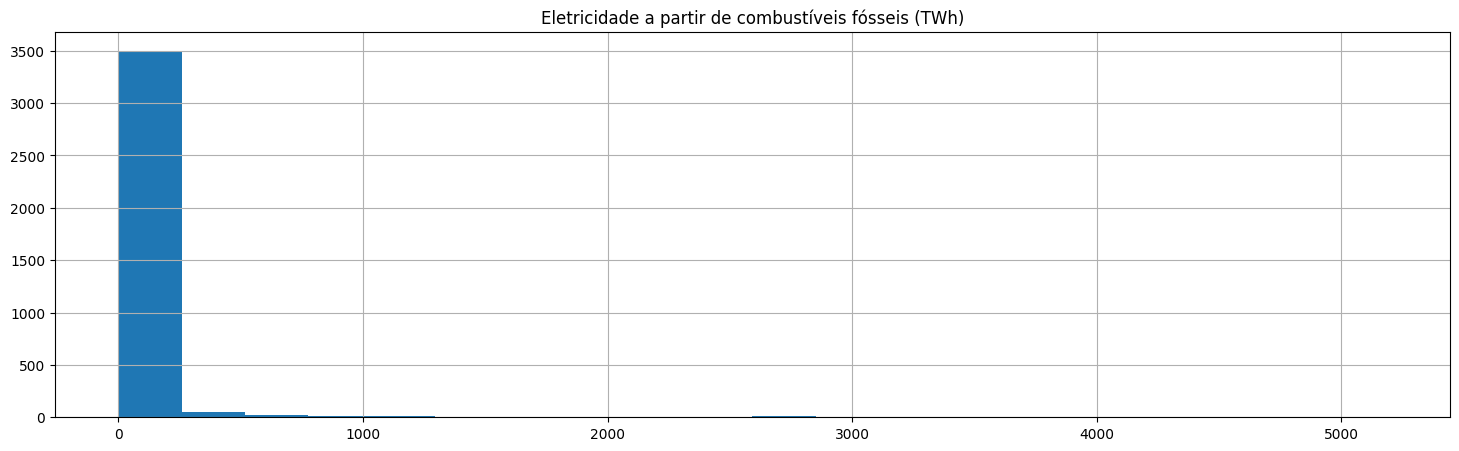

In [ ]:
df.hist(column=coluna,bins=calsses2)
plt.show
